# CTG

In [1]:
#load packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
#import graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.model_selection import StratifiedKFold
from scipy.stats import wilcoxon
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
from pandas.api.types import CategoricalDtype
KNeighboursClassifier = KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC, SVC
from sklearn import tree
import statistics 
from sklearn.model_selection import KFold
from matplotlib import pyplot
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import euclidean_distances
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import csv
from pandas.plotting import scatter_matrix
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import math

%matplotlib inline

/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
#load daset
data_path = os.path.join(os.getcwd(), 'outputB.csv')
data = pd.read_csv(data_path, delimiter = ',')
data.head(5)

,ID,Apgar,Mean,SD,Sample Entropy,Approximate Entropy,LTV,STV,pH,C,...,Average Baseline,Longest Acc,Longest Dcc,Xapn,Age,Gravidity,Parity,Diabetes,Hypertension,Gravidity_imp
0,1001,8,137.45,17.194,0.053085,0.078616,16.532,2.5142,7.14,0.27744,...,141.09,95.00,171.25,3.3490,32,1.0,0,1,0,1.0
1,1010,9,125.53,16.069,0.027505,0.048909,15.797,1.6795,7.35,0.38038,...,131.53,19.00,361.25,2.2089,23,1.0,0,0,0,1.0
2,1100,7,130.19,19.785,0.057006,0.063969,16.075,2.6028,7.18,0.37559,...,134.29,78.75,223.75,2.2095,31,1.0,0,0,0,1.0
3,1101,8,123.35,21.500,0.025599,0.043087,15.628,2.1074,7.16,0.36607,...,130.11,186.50,226.25,3.1582,36,1.0,0,0,0,1.0
4,1102,10,135.53,13.585,0.028232,0.041393,16.424,1.2269,7.35,0.36762,...,138.63,38.25,181.00,2.1251,28,1.0,0,0,0,1.0


## 1.1 Re-map Apgar

In [3]:
data['Apgar'].value_counts()

10    230
9     204
8      72
7      27
6      14
4       4
5       1
Name: Apgar, dtype: int64

In [4]:
# re-map Apgar scores
data['Apgar'] = data['Apgar'].map(lambda v: 0 if v > 6  else 1)

In [249]:
data['Apgar'].value_counts()

0    533
1     19
Name: Apgar, dtype: int64

<AxesSubplot:title={'center':'Apgar score distribution'}>

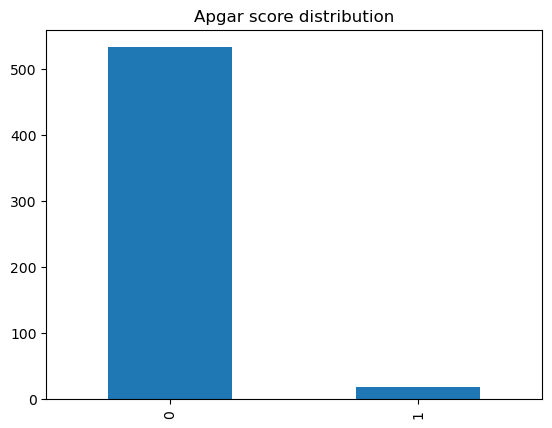

In [134]:
#plot distribution of y
pd.Categorical(data['Apgar']).value_counts().plot(kind = 'bar', title = 'Apgar score distribution')

## 1.2 re-map pH

In [103]:
data['pH'].value_counts()

7.32    30
7.27    26
7.29    26
7.26    26
7.24    24
7.30    23
7.28    23
7.16    22
7.18    21
7.25    21
7.23    19
7.22    18
7.20    17
7.34    16
7.21    16
7.35    16
7.14    16
7.31    16
7.13    16
7.33    14
7.19    13
7.36    12
7.37    10
7.17     8
7.15     8
7.03     8
7.12     7
7.39     7
6.98     5
7.10     5
7.02     5
7.11     5
7.09     4
7.08     4
7.05     4
7.38     4
7.41     3
7.07     3
6.92     3
7.01     3
6.93     2
6.96     2
7.40     2
6.95     2
7.04     2
7.00     2
6.99     2
7.43     2
7.47     2
6.97     1
7.06     1
7.44     1
7.42     1
6.90     1
6.87     1
6.85     1
Name: pH, dtype: int64

In [104]:
# re-map pH scores
data['pH'] = data['pH'].map(lambda v: 1 if v < 7.05 else 0)

In [105]:
data['pH'].value_counts()

0    512
1     40
Name: pH, dtype: int64

<AxesSubplot:title={'center':'pH distribution'}>

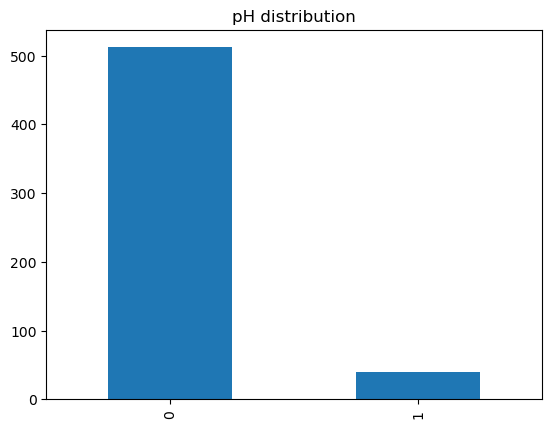

In [255]:
#plot distribution of y
pd.Categorical(data['pH']).value_counts().plot(kind = 'bar', title = 'pH distribution')

## 2. Feature Selection

In [5]:
#split dataset
X = data.drop(['ID', 'Apgar','pH'], axis = 1)
X = X[['Longest Dcc', 'Longest Acc', 'Mean','SD', 'LTV', 'STV', 'Delta', 'Number of IMF', 'psd_LF', 'Average Baseline', 'Xapn']]
print(X.shape)
column_names = list(X.columns) 
print(column_names)

#y labels
y = data['Apgar']  ### change this to adapt to Apagr or pH as labels
print(y.shape)

(552, 11)
['Longest Dcc', 'Longest Acc', 'Mean', 'SD', 'LTV', 'STV', 'Delta', 'Number of IMF', 'psd_LF', 'Average Baseline', 'Xapn']
(552,)


In [6]:
# number of columns
cols = len(X.axes[1])
print(cols)

11


In [7]:
X.isna()

,Longest Dcc,Longest Acc,Mean,SD,LTV,STV,Delta,Number of IMF,psd_LF,Average Baseline,Xapn
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
547,False,False,False,False,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False,False,False,False,False
549,False,False,False,False,False,False,False,False,False,False,False
550,False,False,False,False,False,False,False,False,False,False,False


# 3. Data exploratory

### Frequency Domain

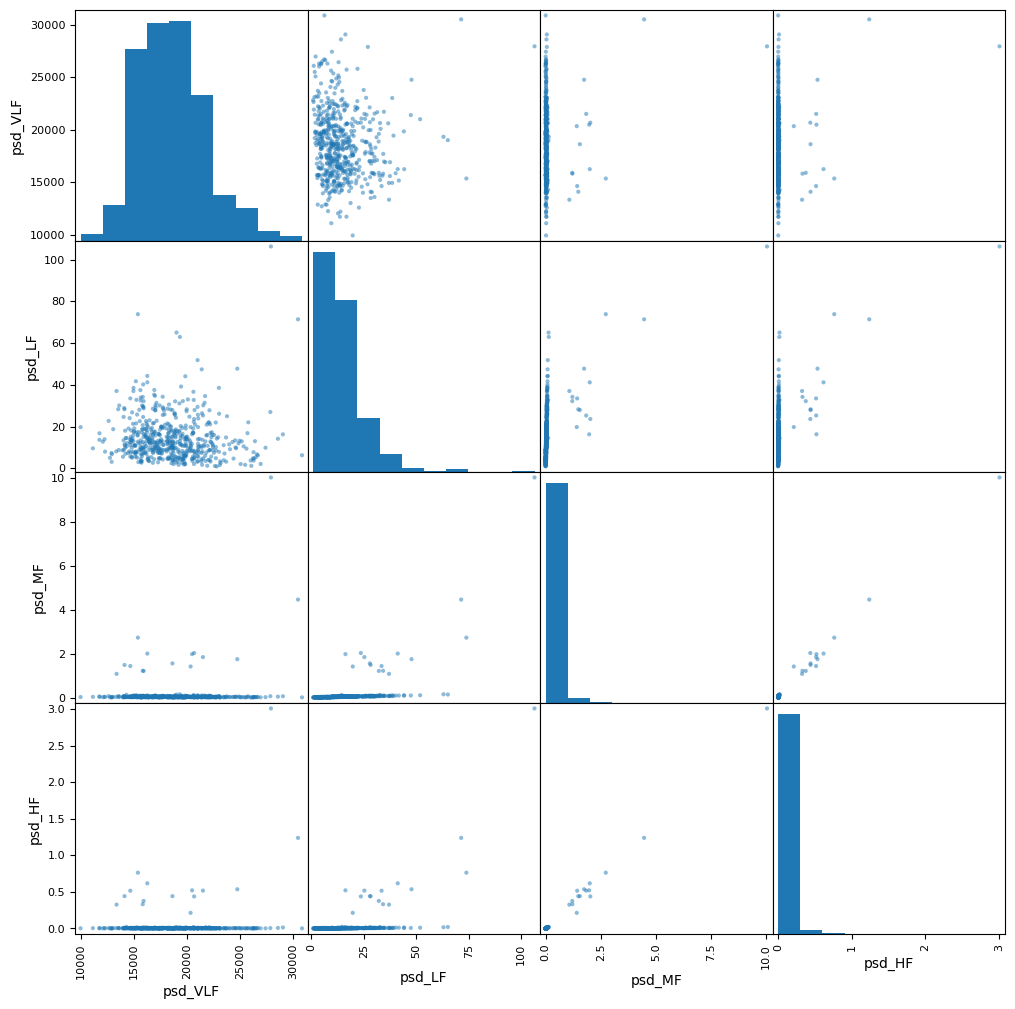

In [8]:
_ = pd.plotting.scatter_matrix(data[['psd_VLF', 'psd_LF', 'psd_MF', 'psd_HF']], figsize=(12, 12))

### Time domain

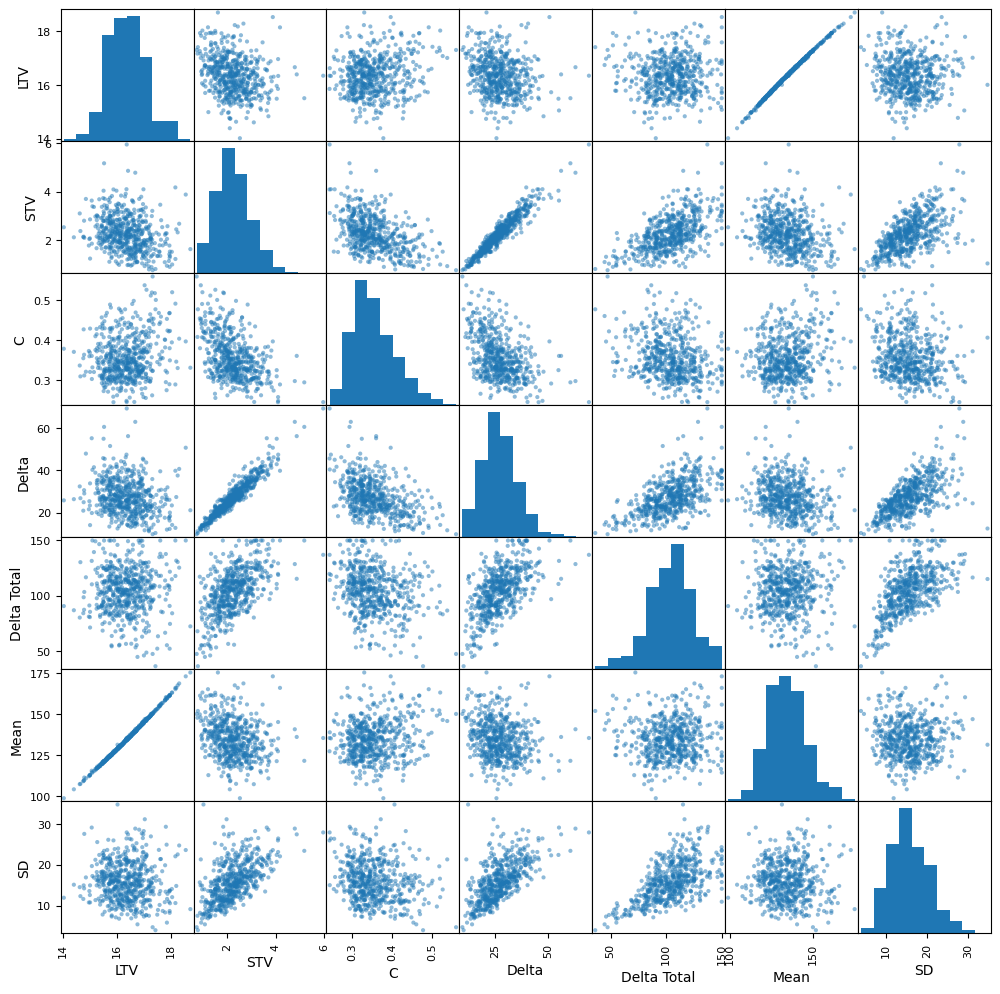

In [75]:
_ = pd.plotting.scatter_matrix(data[['LTV', 'STV', 'C', 'Delta', 'Delta Total', 'Mean', 'SD']], figsize=(12, 12))

### Morphological

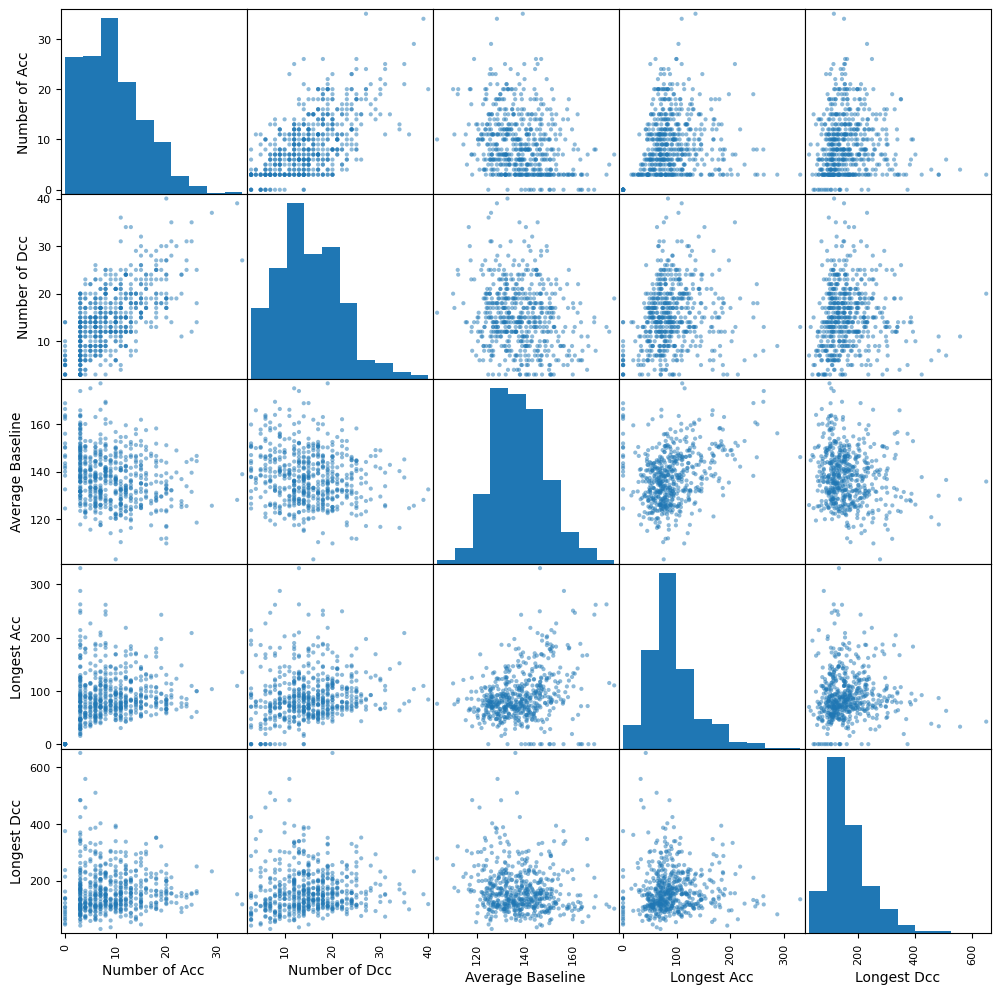

In [76]:
_ = pd.plotting.scatter_matrix(data[['Number of Acc', 'Number of Dcc', 'Average Baseline', 'Longest Acc', 'Longest Dcc']], figsize=(12, 12))

### Non-linear

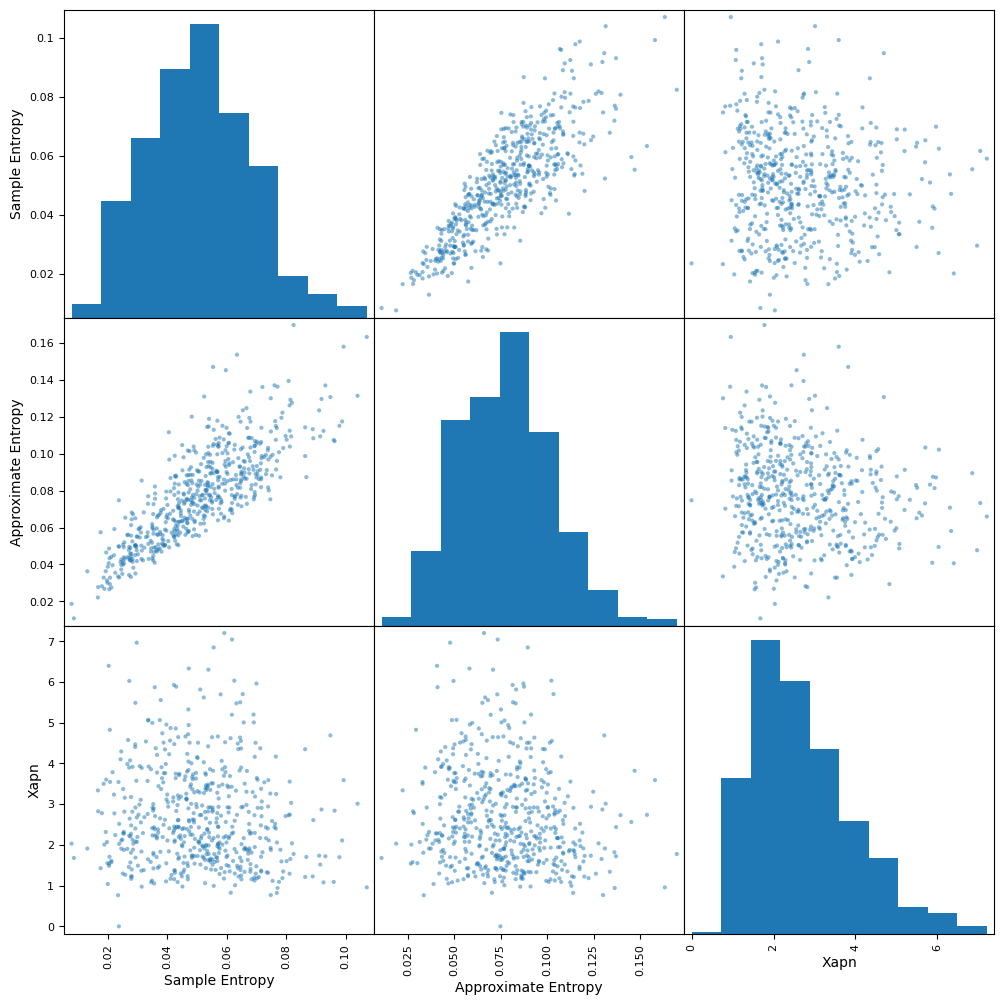

In [77]:
_ = pd.plotting.scatter_matrix(data[['Sample Entropy', 'Approximate Entropy', 'Xapn']], figsize=(12, 12))

### Correlation functions

#### Frequency domains

In [78]:
data[['psd_VLF', 'psd_LF', 'psd_MF', 'psd_HF']].corr(method ='pearson')

,psd_VLF,psd_LF,psd_MF,psd_HF
psd_VLF,1.000000,-0.037409,0.138596,0.137003
psd_LF,-0.037409,1.000000,0.540726,0.523445
psd_MF,0.138596,0.540726,1.000000,0.996367
psd_HF,0.137003,0.523445,0.996367,1.000000


#### Time domains

In [79]:
data[['LTV', 'STV', 'C', 'Delta', 'Delta Total']].corr(method ='pearson')

,LTV,STV,C,Delta,Delta Total
LTV,1.000000,-0.255892,0.169330,-0.198013,0.011676
STV,-0.255892,1.000000,-0.460763,0.955732,0.569312
C,0.169330,-0.460763,1.000000,-0.445478,-0.239867
Delta,-0.198013,0.955732,-0.445478,1.000000,0.576701
Delta Total,0.011676,0.569312,-0.239867,0.576701,1.000000


#### Morphological features

In [80]:
data[['Number of Acc', 'Number of Dcc', 'Average Baseline', 'Longest Acc', 'Longest Dcc']].corr(method ='pearson')

,Number of Acc,Number of Dcc,Average Baseline,Longest Acc,Longest Dcc
Number of Acc,1.000000,0.616032,-0.251009,0.134804,0.002784
Number of Dcc,0.616032,1.000000,-0.181524,0.147403,0.028525
Average Baseline,-0.251009,-0.181524,1.000000,0.291929,-0.163092
Longest Acc,0.134804,0.147403,0.291929,1.000000,0.015568
Longest Dcc,0.002784,0.028525,-0.163092,0.015568,1.000000


#### Non-linear

In [81]:
data[['Sample Entropy', 'Approximate Entropy', 'Xapn']].corr(method ='pearson')

,Sample Entropy,Approximate Entropy,Xapn
Sample Entropy,1.000000,0.821411,-0.082790
Approximate Entropy,0.821411,1.000000,-0.140621
Xapn,-0.082790,-0.140621,1.000000


## 4. Grid Search CV

In [9]:
#define function for CV learning
def do_cv_learning(X, y, classifier, hyperparameter_space, verbose=False, 
                   do_scale=True, random_state=1,
                   scoring='roc_auc', folds=3, over_sampling=True): # took off = folds=10
    cv = StratifiedKFold(n_splits=folds, shuffle=True, random_state=random_state)
    aucs = []
    ORs = []
    models = []
    cms = []
    y_test = []
    y_train = []

    #scoring = {'AUC': 'roc_auc', 'F1': 'f1_micro', 'Precision': 'precision', 'Recall':'recall'}

    X = np.array(X)
    y = np.array(y)
    if do_scale:
        sc = StandardScaler()
        X = sc.fit_transform(X)

    #what is the split ratio?
    for i, (train, test) in enumerate(cv.split(X, y)):   #took out cv.split
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]

        # oversampling both set
        if over_sampling:
          sm = SMOTE(random_state=random_state)
          X_train, y_train = sm.fit_resample(X_train, y_train)
       # X_test, y_test = sm.fit_resample(X_test, y_test)
        
        # do grid search on training
        gscv = GridSearchCV(classifier, hyperparameter_space, cv=3, # should the cv be 3 or 10?
                            scoring=scoring, n_jobs=-1)
        grid_result = gscv.fit(X_train, y_train)
        best_params = grid_result.best_params_

        # print the score for CV for training


        train_score = grid_result.cv_results_  ## added by Farah
        if verbose:
            print('fold', i, 'best_params', best_params)

        # do the prediction on testing and collect results
        clf = grid_result.best_estimator_
        auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
        cm = confusion_matrix(y_test, clf.predict(X_test))
        cms.append(cm)
        aucs.append(auc)
        print(y_test) ## added by Farah

        if hasattr(clf, 'coef_'):
            ORs.append([math.exp(c) for c in clf.coef_[0]])
        models.append(grid_result.best_estimator_)
    return aucs, cms, ORs, models, y_test, y_train

### make print CV and add to the table to compare with the test

In [10]:
# get precision recall f1 from confusion matrix
def get_pr_f1(cm):
  tn, fp, fn, tp = cm.ravel()
  precision = tp / (tp + fp)
  recall = tp / (tp + fn)
  f1 = 2 * precision * recall / (precision + recall)
  return precision, recall, f1

In [11]:
from sklearn.metrics import f1_score, roc_auc_score, make_scorer

# create a scorer by speicifying the pos label
from sklearn.metrics import precision_score, make_scorer
custom_scorer = make_scorer(f1_score, greater_is_better=True,  pos_label=1)

## 5. ML

### 5.1 Random forest

In [12]:
# set random state for reproduction
random_state = 42

# create RF classifier
rf_clf = RandomForestClassifier(random_state=random_state, n_jobs=-1)
# set the hyperparameters and their search spaces
rf_parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'criterion' : ['gini', 'entropy'], #added by me
    'max_features': ['auto', 'sqrt', 'log2'] #added by me
    }

rf_aucs, rf_cms, _, _ ,y_test, y_train = do_cv_learning(X, y, rf_clf, rf_parameters, 
                                 scoring=custom_scorer, 
                                 folds=3,
                                 do_scale=True,
                                 over_sampling=True,
                                 verbose=True)

fold 0 best_params {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 50}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
fold 1 best_params {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 100}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
fold 2 best_params {'criterion': 'entropy', 'ma

#### RF with selected hyperparameters

In [264]:
random_state = 42
rf_clf = RandomForestClassifier(random_state=random_state, n_jobs=-1)
rf_parameters = {
    'n_estimators': [50],
    'max_depth': [5],
    'criterion' : ['gini'], #added by me
    'max_features': ['auto'] #added by me
    }

rf_aucs, rf_cms, _, _, y_test, y_train = do_cv_learning(X, y, rf_clf, rf_parameters, 
                                 scoring=custom_scorer, 
                                 folds=3,
                                 do_scale=True,
                                 over_sampling=False,
                                 verbose=True)

fold 0 best_params {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 50}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
fold 1 best_params {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 50}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
fold 2 best_params {'criterion': 'gini', 'max_dept

In [265]:
# ROC AUC summary
rf_aucs = pd.DataFrame(rf_aucs, columns=['ROC-AUC']).describe()
print(rf_aucs)

        ROC-AUC
count  3.000000
mean   0.596821
std    0.106168
min    0.485955
25%    0.546448
50%    0.606941
75%    0.652253
max    0.697566


In [15]:
rf_pr = pd.DataFrame([get_pr_f1(cm) for cm in rf_cms], columns=['precision', 'recall', 'f1']).describe()
#rf_results = pd.concat([rf_aucs, rf_pr], axis=1)
#print(rf_results)

/var/folders/xx/frprvrvx5tnbdp7nj0q2h3780000gn/T/ipykernel_47283/1388925761.py:6: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * precision * recall / (precision + recall)


In [267]:
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [153]:
# porportion of split
print('proportion of split', np.mean(y_test))

proportion of split 0.03804347826086957


In [154]:
y_test = pd.DataFrame(y_test)

In [155]:
y_test.describe()

,0
count,184.000000
mean,0.038043
std,0.191823
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [268]:
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 177]
 [  1   7]]


In [261]:
y_test.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [262]:
elements_count = {}
# iterating over the elements for frequency
for element in y_test:
   # checking whether it is in the dict or not
   if element in elements_count:
      # incerementing the count by 1
      elements_count[element] += 1
   else:
      # setting the count to 1
      elements_count[element] = 1
# printing the elements frequencies
for key, value in elements_count.items():
   print(f"{key}: {value}")


0: 177
1: 7


In [269]:
elements_count = {}
# iterating over the elements for frequency
for element in y_train:
   # checking whether it is in the dict or not
   if element in elements_count:
      # incerementing the count by 1
      elements_count[element] += 1
   else:
      # setting the count to 1
      elements_count[element] = 1
# printing the elements frequencies
for key, value in elements_count.items():
   print(f"{key}: {value}")


0: 356
1: 12


<AxesSubplot:title={'center':'Apgar distribution'}>

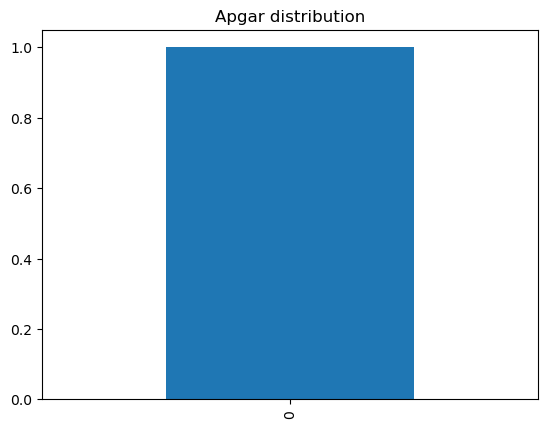

In [160]:
#plot distribution of y
pd.Categorical(y_test).value_counts().plot(kind = 'bar', title = 'Apgar distribution')

#### important features

In [41]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


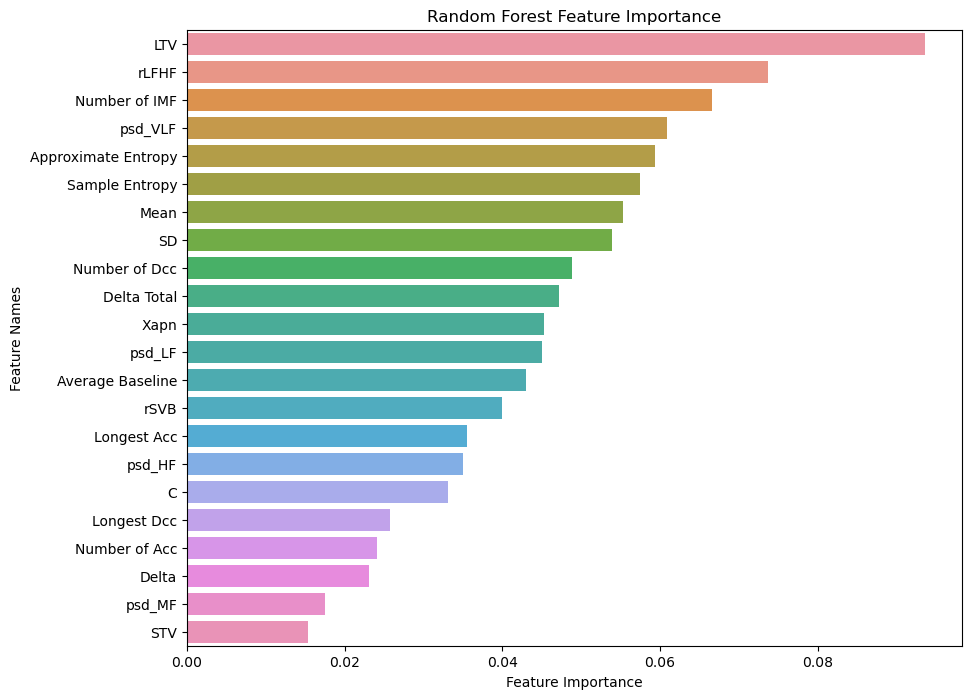

In [143]:
rf = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=5, max_features='auto') ## changed everytime I ran it
rf = rf.fit(X, y)
plot_feature_importance(rf.feature_importances_,X.columns,'Random Forest ')

In [117]:
## using RFE

from sklearn.feature_selection import RFE
randon_forest = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=5, max_features='auto')
rfe = RFE(estimator = randon_forest)
rfe = rfe.fit(X, y)
print(rfe.support_)
#print(rfe.ranking_)

/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

[ True  True  True  True  True False False False False  True  True False
  True False  True  True False False  True False False False]


In [145]:
Columns = X.columns
dataset = pd.DataFrame({'Columns': Columns, 'RFE_support': rfe.support_, 'RFE_ranking': rfe.ranking_}, columns=['Columns', 'RFE_support', 'RFE_ranking'])
df = dataset[(dataset["RFE_support"] == True) & (dataset["RFE_ranking"] == 1)]
filtered_features = df['Columns']
filtered_features
#filtered_features.to_csv('RFE.csv')

0                    Mean
1                      SD
2          Sample Entropy
3     Approximate Entropy
4                     LTV
9           Number of IMF
10                psd_VLF
12                 psd_MF
14                  rLFHF
15                   rSVB
18       Average Baseline
Name: Columns, dtype: object

### 5.2 Support Vector Machine

In [79]:
# set random state for reproduction
random_state = 42

# create RF classifier
svm_clf = SVC (random_state= random_state, probability= True)
# set the hyperparameters and their search spaces
svm_parameters = {
        'kernel': ('linear', 'rbf', 'poly'), 
        'C': [1, 2, 5], 
        'gamma': ['auto', 'scale'], 
        'class_weight' : ['balanced', 'None']
        }

svm_aucs, svm_cms, _, _ , y_test, y_train= do_cv_learning(X, y, svm_clf, svm_parameters, 
                                 scoring=custom_scorer, 
                                 folds=3,
                                 do_scale=True,
                                 over_sampling=True,
                                 verbose=True)

/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/svm/_base

fold 0 best_params {'C': 5, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1]


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/svm/_base

fold 1 best_params {'C': 5, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}
[0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0]
fold 2 best_params {'C': 5, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}
[1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/svm/_base

In [80]:
# ROC AUC summary
pd.DataFrame(svm_aucs, columns=['ROC-AUC']).describe()

,ROC-AUC
count,3.000000
mean,0.638112
std,0.042197
min,0.605482
25%,0.614286
50%,0.623090
75%,0.654428
max,0.685765


In [81]:
svm_pr = pd.DataFrame([get_pr_f1(cm) for cm in svm_cms], columns=['precision', 'recall', 'f1']).describe()
#svm_results = pd.concat([svm_aucs, svm_pr], axis=1)
#print(svm_results)
print(svm_pr)

       precision    recall        f1
count   3.000000  3.000000  3.000000
mean    0.335211  0.355556  0.344202
std     0.044550  0.086015  0.064667
min     0.285714  0.256410  0.270270
25%     0.316770  0.328205  0.321182
50%     0.347826  0.400000  0.372093
75%     0.359960  0.405128  0.381168
max     0.372093  0.410256  0.390244


### 5.3 K-NN

In [22]:
# set random state for reproduction
random_state = 42

# create RF classifier
knn_clf = KNeighborsClassifier()
# set the hyperparameters and their search spaces
knn_parameters = {
    'n_neighbors' : [1, 2, 5, 7, 10],
    'weights' : ('uniform', 'distance'),
    'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute'),
    }


knn_aucs, knn_cms, _, _, y_test, y_train = do_cv_learning(X, y, knn_clf, knn_parameters, 
                                 scoring=custom_scorer, 
                                 folds=5,
                                 do_scale=False,
                                 over_sampling=False,
                                 verbose=True)

fold 0 best_params {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
fold 1 best_params {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
fold 2 best_params {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
fold 3 best_params {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


In [23]:
# ROC AUC summary
pd.DataFrame(knn_aucs, columns=['ROC-AUC']).describe()

,ROC-AUC
count,5.000000
mean,0.486863
std,0.003952
min,0.481132
25%,0.485981
50%,0.485981
75%,0.490566
max,0.490654


In [24]:
knn_pr = pd.DataFrame([get_pr_f1(cm) for cm in svm_cms], columns=['precision', 'recall', 'f1']).describe()
#svm_results = pd.concat([svm_aucs, svm_pr], axis=1)
#print(svm_results)
print(knn_pr)

       precision    recall        f1
count   3.000000  3.000000  2.000000
mean    0.114286  0.166667  0.201923
std     0.103016  0.166667  0.067991
min     0.000000  0.000000  0.153846
25%     0.071429  0.083333  0.177885
50%     0.142857  0.166667  0.201923
75%     0.171429  0.250000  0.225962
max     0.200000  0.333333  0.250000


/var/folders/xx/frprvrvx5tnbdp7nj0q2h3780000gn/T/ipykernel_5767/1388925761.py:6: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * precision * recall / (precision + recall)


### 5.4 Multiple level perceptron

In [254]:

from sklearn.neural_network import MLPClassifier
# set random state for reproduction
random_state = 42

# create RF classifier
mlp_clf = MLPClassifier(random_state = random_state )
# set the hyperparameters and their search spaces
mlp_parameters = {
    'hidden_layer_sizes' : [100, 150, 200, 250, 300, 350, 400],
    'activation' : ('identity', 'logistic', 'tanh', 'relu'),
    'solver' : ('adam', 'lbfgs', 'sgd'),
    'learning_rate' : ('constant', 'invscalling', 'adaptive'),
    }


mlp_aucs, mlp_cms, _, _, y_test, y_train = do_cv_learning(X, y, mlp_clf, mlp_parameters, 
                                 scoring=custom_scorer, 
                                 folds=3,
                                 do_scale=True,
                                 over_sampling=True,
                                 verbose=True)

/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

fold 0 best_params {'activation': 'relu', 'hidden_layer_sizes': 350, 'learning_rate': 'constant', 'solver': 'lbfgs'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

fold 1 best_params {'activation': 'relu', 'hidden_layer_sizes': 250, 'learning_rate': 'constant', 'solver': 'adam'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

fold 2 best_params {'activation': 'relu', 'hidden_layer_sizes': 350, 'learning_rate': 'constant', 'solver': 'lbfgs'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


##### Selected parameters for MLP

In [255]:
# ROC AUC summary
pd.DataFrame(mlp_aucs, columns=['ROC-AUC']).describe()

,ROC-AUC
count,3.000000
mean,0.516235
std,0.028247
min,0.497191
25%,0.500008
50%,0.502825
75%,0.525757
max,0.548689


In [256]:
results = pd.DataFrame([get_pr_f1(cm) for cm in mlp_cms], columns=['precision', 'recall', 'f1']).describe()
print(results)

       precision    recall        f1
count   3.000000  3.000000  2.000000
mean    0.084656  0.103175  0.139423
std     0.075013  0.090141  0.020397
min     0.000000  0.000000  0.125000
25%     0.055556  0.071429  0.132212
50%     0.111111  0.142857  0.139423
75%     0.126984  0.154762  0.146635
max     0.142857  0.166667  0.153846


/var/folders/xx/frprvrvx5tnbdp7nj0q2h3780000gn/T/ipykernel_5767/1388925761.py:6: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * precision * recall / (precision + recall)


### 5.5 Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
random_state = 42
lg_predictor = LogisticRegression(random_state = random_state)
lg_parameters = {
    'penalty': ['l2', 'l1', 'elasticnet'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    }

lg_aucs, lg_cms, _, _ = do_cv_learning(X, y, lg_predictor, lg_parameters, 
                                 scoring=custom_scorer, 
                                 folds=5,
                                 do_scale=False,
                                 over_sampling=False,
                                 verbose=True)

/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_

fold 0 best_params {'penalty': 'l2', 'solver': 'lbfgs'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
fold 1 best_params {'penalty': 'l2', 'solver': 'lbfgs'}
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_

fold 2 best_params {'penalty': 'l2', 'solver': 'lbfgs'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
fold 3 best_params {'penalty': 'l2', 'solver': 'lbfgs'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
fold 4 best_params {'penalty': 'l2', 'solver': 'lbfgs'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_

In [94]:
# ROC AUC summary
pd.DataFrame(lg_aucs, columns=['ROC-AUC']).describe()

,ROC-AUC
count,5.000000
mean,0.583148
std,0.222936
min,0.389151
25%,0.436916
50%,0.511792
75%,0.630841
max,0.947040


### 5.6 XGboost

In [95]:
import xgboost as xgb

random_state = 42

xg_predictor = xgb.XGBClassifier(objective ='reg:squarederror', 
                                  colsample_bytree = 0.3, 
                                  learning_rate = 0.1,
                                  max_depth = 5, alpha = 10, 
                                  n_estimators = 10)
xg_parameters = {
    'objective': ['reg:squarederror', 'reg:logistic'],
    'learning_rate': [.02, .1, .5],
    'max_depth': [5, 10, 20],
    'n_estimators': [20, 50],
    'colsample_bytree': [.5, .7, 1]
    }

xg_aucs, xg_cms, _, _ = do_cv_learning(X, y, xg_predictor, xg_parameters, 
                                 scoring=custom_scorer, 
                                 folds=5,
                                 do_scale=True,
                                 over_sampling=False,
                                 verbose=True)

/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index 

fold 0 best_params {'colsample_bytree': 0.5, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 20, 'objective': 'reg:squarederror'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/farahfrancis/opt/anaconda3/

fold 1 best_params {'colsample_bytree': 0.5, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 20, 'objective': 'reg:squarederror'}
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/farahfrancis/opt/anaconda3/

fold 2 best_params {'colsample_bytree': 0.5, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 20, 'objective': 'reg:squarederror'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/farahfrancis/opt/anaconda3/

fold 3 best_params {'colsample_bytree': 0.5, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 20, 'objective': 'reg:squarederror'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/farahfrancis/opt/anaconda3/

fold 4 best_params {'colsample_bytree': 0.5, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 20, 'objective': 'reg:squarederror'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [96]:
# ROC AUC summary
pd.DataFrame(xg_aucs, columns=['ROC-AUC']).describe()

,ROC-AUC
count,5.000000
mean,0.558474
std,0.071979
min,0.485849
25%,0.490654
50%,0.568925
75%,0.589623
max,0.657321


# 6. Importnt features

### 6.1 Random forest

In [97]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'Feature Importance')
    plt.xlabel('Feature Importance')

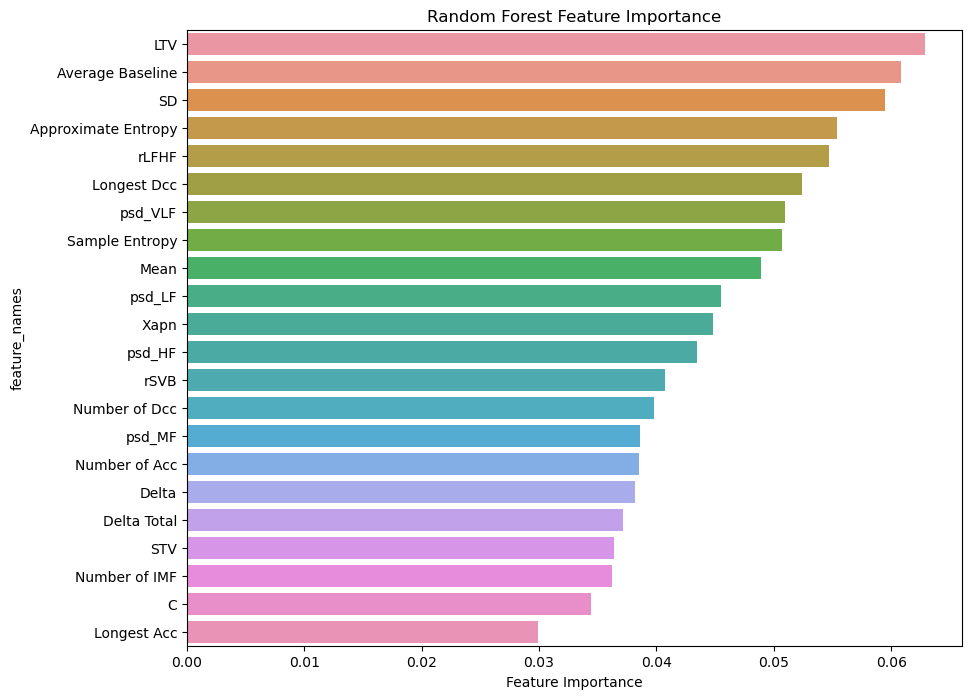

In [98]:
rf = RandomForestClassifier(random_state=random_state) #different random state gives different important features
rf = rf.fit(X,y)
plot_feature_importance(rf.feature_importances_,X.columns,'Random Forest ')

### 6.2 recursive feature elimination

In [99]:
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X, y)
print(rfe.support_)

/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

[ True  True False False  True  True False  True False  True False  True
  True  True False False False False  True False False  True]


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
Columns = X.columns
dataset = pd.DataFrame({'Columns': Columns, 'RFE_support': rfe.support_, 'RFE_ranking': rfe.ranking_}, columns=['Columns', 'RFE_support', 'RFE_ranking'])
df = dataset[(dataset["RFE_support"] == True) & (dataset["RFE_ranking"] == 1)]
filtered_features = df['Columns']
filtered_features

0                 Mean
1                   SD
4                  LTV
5                  STV
7                Delta
9        Number of IMF
11              psd_LF
12              psd_MF
13              psd_HF
18    Average Baseline
21                Xapn
Name: Columns, dtype: object

In [126]:
# set random state for reproduction
random_state = 42

# create RF classifier
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1000)
# set the hyperparameters and their search spaces
dt_parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'criterion' : ['gini', 'entropy'], #added by me
    'max_features': ['auto', 'sqrt', 'log2'] #added by me
    }

dt_aucs, dt_cms, _, _ ,y_test, y_train = do_cv_learning(X, y, rf_clf, dt_parameters, 
                                 scoring=custom_scorer, 
                                 folds=3,
                                 do_scale=False,
                                 over_sampling=False,
                                 verbose=True)

/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

fold 0 best_params {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 50}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

fold 1 best_params {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 50}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

fold 2 best_params {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 50}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [127]:
# ROC AUC summary
pd.DataFrame(dt_aucs, columns=['ROC-AUC']).describe()

,ROC-AUC
count,3.000000
mean,0.643537
std,0.086256
min,0.544007
25%,0.617041
50%,0.690075
75%,0.693302
max,0.696529


In [128]:
dt_pr = pd.DataFrame([get_pr_f1(cm) for cm in dt_cms], columns=['precision', 'recall', 'f1']).describe()
#svm_results = pd.concat([svm_aucs, svm_pr], axis=1)
#print(svm_results)
print(dt_pr)

       precision  recall   f1
count        0.0     3.0  0.0
mean         NaN     0.0  NaN
std          NaN     0.0  NaN
min          NaN     0.0  NaN
25%          NaN     0.0  NaN
50%          NaN     0.0  NaN
75%          NaN     0.0  NaN
max          NaN     0.0  NaN


/var/folders/xx/frprvrvx5tnbdp7nj0q2h3780000gn/T/ipykernel_525/1388925761.py:4: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
